# Minor thesis code

ID: 29502861

Name: Bin Wang

Last modified: 5.7.2020

## Required libraries

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.signal import find_peaks
import seaborn as sns
import os
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Data import

In [ ]:
# convert data type
path = r"Change path"
files= os.listdir(path)
save_path = r"Change path"
for txt in files:
    temp = pd.read_table(path+"\\"+ txt)
    temp.to_csv(save_path+"\\"+ txt + '.csv', encoding='utf-8', index = None)
    
# import data for analysis
data = pd.read_table(r"GSM1448808_dr_10ss_LR.csv",delimiter = ',') #change directory
# set index
data.index = data['GENEID'] 
data = data.drop(['GENEID'], axis=1)

# subset gene
# # since genes have little read count from section 45-96, we can delete them all
data = data[data.columns[0:44]]

# divide the data into genes and ercc
ercc = data[data.index.str.contains("ERCC")]
gene = data[data.index.str.contains("ENSD")]

## Data normalization


In [ ]:
# spike-in normalization for each column
spike_sum = ercc.sum(axis=0)+0.1 # to account for reads=0, 0.1 is added before calculating the sum.
spike_data_col = all_gene_44.div(sum_spike_0001,axis=1)

# TC normalization for each row
tc_data_row = spike_data_col.div(spike_data_col.sum(axis=1), axis=0) 

## EDA of LPM marker genes (Visualization)

### Overall expression level across sections



In [14]:
# read data
lpm_data = pd.read_table(r"tc_lpm_row.csv",delimiter = ',')
lpm_data.index = lpm_data['GENEID']
lpm_data = lpm_data.drop(['GENEID'], axis=1)

Text(0, 0.5, 'Total reads')

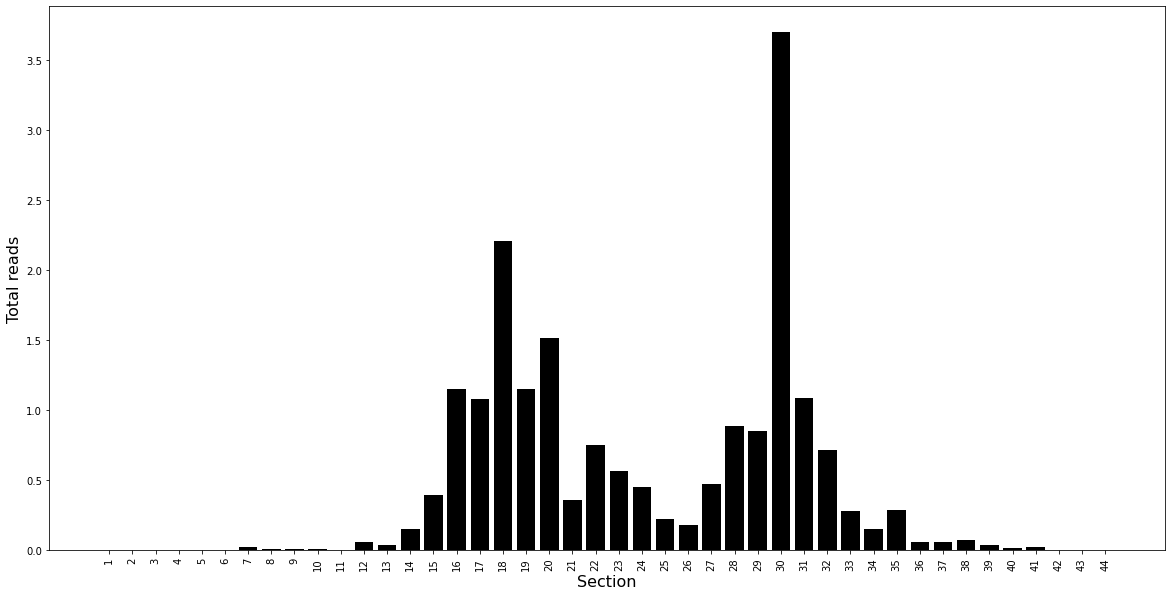

In [3]:
# total read counts across sections
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.bar(lpm_data.columns,lpm_data.sum(),color='black')
plt.xlabel('Section',fontsize=16)
plt.ylabel('Total reads',fontsize=16)
# plt.title('Total reads of LPM marker genes',fontsize=20)

Text(0, 0.5, 'Expression level')

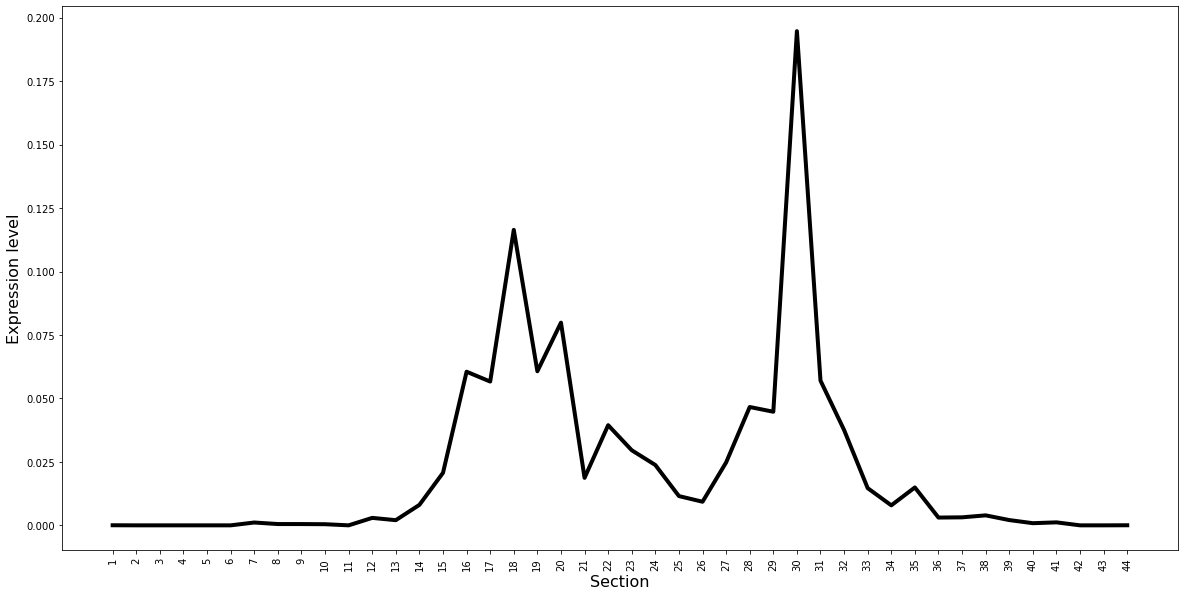

In [13]:
# Analyze expression level for each section
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(lpm_data.columns,lpm_data.mean(),color='black',linewidth=4.0) # change mean to median if needed
plt.xlabel('Section',fontsize=16)
plt.ylabel('Expression level',fontsize=16)
# plt.title('Average expression level of LPM marker genes',fontsize=20)

Text(0, 0.5, 'Expression level')

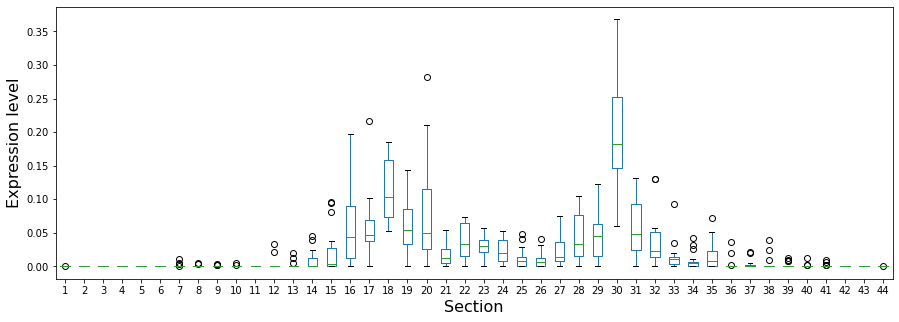

In [11]:
# variability of expression level
lpm_data.boxplot(figsize=(15,5),grid = False)
plt.xlabel('Section',fontsize=16)
plt.ylabel('Expression level',fontsize=16)
# plt.title('Variability expression level of LPM marker genes',fontsize=20)

### Expression level of particular genes

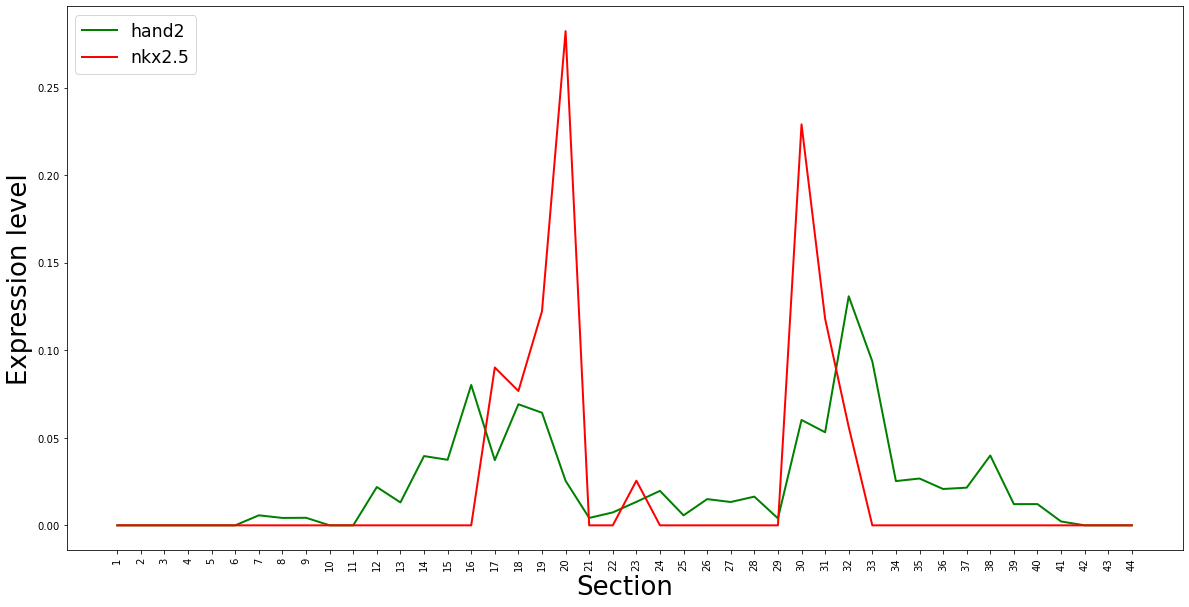

In [10]:
## for example hand2 nkx2.5
plt.figure(figsize=(20,10))
gene_list = lpm_data.loc[['ENSDARG00000008305','ENSDARG00000018004'],:] #change gene id
gene_list.index = ['hand2','nkx2.5']
plt.xticks(rotation=90)
plt.plot(gene_list.columns,gene_list.loc['hand2'],color = 'green',linewidth = 2,label="hand2")
plt.plot(gene_list.columns,gene_list.loc['nkx2.5'],color = 'red',linewidth = 2,label="nkx2.5")
plt.xlabel('Section',fontsize=26)
plt.ylabel('Expression level',fontsize=26)
plt.legend(loc="upper left",fontsize='xx-large')

## Expression patterns analysis

In [3]:
lpm_data = pd.read_table(r"F:\s4\research\data\normalization\tc_lpm_row.csv",delimiter = ',')
lpm_data.index = lpm_data['GENEID']
lpm_data = lpm_data.drop(['GENEID'], axis=1)
# lpm_data.index = lpm_data['GENEID']
# lpm_data = lpm_data.drop(['GENEID'], axis=1)

In [7]:
# change gene's real expression level into discrete values
peak_df = pd.DataFrame(columns=range(1,45))
peak_df['gene_id'] = lpm_data.index
peak_df.index = peak_df['gene_id']
peak_df = peak_df.drop(['gene_id'], axis=1)
for gene_id in lpm_data.index:
    temp = []
    peak = [0]*44
    list_gene = lpm_data.loc[[gene_id],:].values.flatten()
    ## store peaks location
    peaks, _ = find_peaks(list_gene)
    for value in list_gene:
        if value >0:
            temp.append(value)
    ## calculate quartile of expression ratio
    max_value = np.amax(temp)
    compare_max = temp/max_value
    q_75 = np.quantile(compare_max,0.75)
    q_25 = np.quantile(compare_max,0.50)
    IQR = q_75 - q_25
    ## save final threshold
    threshold = 1.5 * IQR + q_75
    ## filtering genes
    for value_index in range(len(list_gene)):
        if list_gene[value_index] / max_value >= q_75:
            peak[value_index] = 1
    for item in peaks:
        if list_gene[item] / max_value >= q_75:
            peak[item] = 2
    peak_df.loc[gene_id] = peak

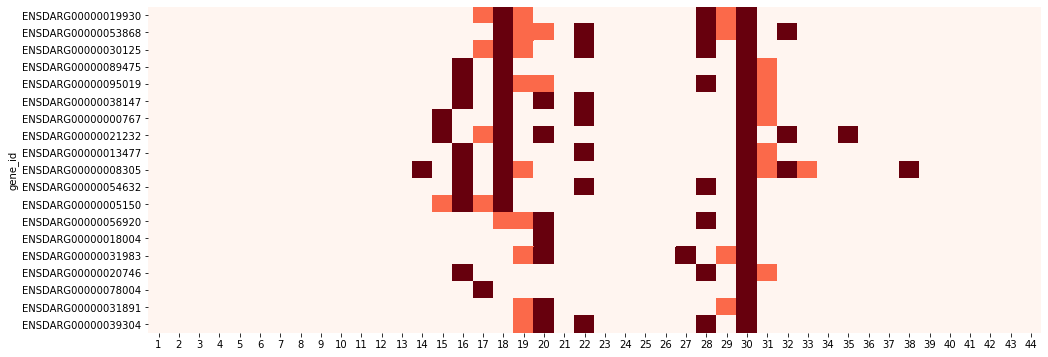

In [22]:
peak_df = peak_df.apply(pd.to_numeric)
peak_df_sort =peak_df.sort_values(by=[18],ascending=False)
plt.figure(figsize=(16, 6))
p1 = sns.heatmap(peak_df_sort,cmap="Reds",cbar=False)


### Dividing sections into expression sub-zones and calculate relative expression ratio

In [23]:
gene_index = []
s1_s2_list = []
s3_s2_list = []
s3_s4_list = []
s5_s4_list = []

for gene_id in lpm_data.index:
## segment gene's expression data into 5 sub-sections
    list_gene = lpm_data.loc[[gene_id],:].values.flatten()
    gene_sec1 = list_gene[0:15]
    gene_sec2 = list_gene[15:20]
    gene_sec3 = list_gene[20:29]
    gene_sec4 = list_gene[29]
    gene_sec5 = list_gene[30:45]

## save the highest value for each section    
    max_sec1 = np.amax(gene_sec1)
    max_sec2 = np.amax(gene_sec2)
    max_sec3 = np.amax(gene_sec3)
    max_sec4 = np.amax(gene_sec4)
    max_sec5 = np.amax(gene_sec5)  
    
## calculate the threshold
    s1_s2 = max_sec1/max_sec2
    s3_s2 = max_sec3/max_sec2
    s3_s4 = max_sec3/max_sec4
    s5_s4 = max_sec5/max_sec4

    s1_s2_list.append(abs(s1_s2))
    s3_s2_list.append(abs(s3_s2))
    s3_s4_list.append(abs(s3_s4))
    s5_s4_list.append(abs(s5_s4))

## calculate quantile
q3_s5_s4 = np.quantile(s5_s4_list,0.75)
q3_s3_s4 = np.quantile(s3_s4_list,0.75)
q3_s3_s2 = np.quantile(s3_s2_list,0.75)
q3_s1_s2 = np.quantile(s1_s2_list,0.75)

q1_s5_s4 = np.quantile(s5_s4_list,0.25)
q1_s3_s4 = np.quantile(s3_s4_list,0.25)
q1_s3_s2 = np.quantile(s3_s2_list,0.25)
q1_s1_s2 = np.quantile(s1_s2_list,0.25)

IQR_s5_s4 = q3_s5_s4 - q1_s5_s4
IQR_s3_s4 = q3_s3_s4 - q1_s3_s4
IQR_s3_s2 = q3_s3_s2 - q1_s3_s2
IQR_s1_s2 = q3_s1_s2 - q1_s1_s2

# expression ratio in neighbouring zones
threshold_s5_s4 = 1.5 * IQR_s5_s4 + q3_s5_s4
threshold_s3_s4 = 1.5 * IQR_s3_s4 + q3_s3_s4
threshold_s3_s2 = 1.5 * IQR_s3_s2 + q3_s3_s4
threshold_s1_s2 = 1.5 * IQR_s1_s2 + q3_s1_s2

In [29]:
# find threshold
print('Z1/Z2: ' + str(round(threshold_s1_s2,2)) +" Z3/Z2: " + str(round(threshold_s3_s2,2)) +" Z4/Z3: " + str(round(threshold_s3_s4,2)) + " Z4/Z5: " + str(round(threshold_s5_s4,2)))

Z1/Z2: 0.42 Z3/Z2: 0.91 Z4/Z3: 0.86 Z4/Z5: 0.96


### Remove genes with no peak expression in LPM zones

In [31]:
# whole tomo-seq data
all_data = pd.read_csv(r"change path")
all_data=all_data[all_data['GENEID'].str.contains("ENSDARG")]
all_data.index = all_data['GENEID']
all_data = all_data.drop(['GENEID'], axis=1)

In [32]:
# remove no peak genes
left_Data = all_data.loc[:, ['15','16','17','18','19','20','21']]
right_data = all_data.loc[:, ['29','30','31']]
remove_index = []
for gene_id in right_data.index:
    left = left_Data.loc[[gene_id],:].values.flatten()
    right = right_data.loc[[gene_id],:].values.flatten()
    if (len(find_peaks(left)[0])==0 )or (len(find_peaks(right)[0])==0):
        remove_index.append(gene_id)
gene_peak = all_data.drop(remove_index,axis=0)


### Distance matrix and contour based model


In [34]:
# SEMLG-average expression
average_lpm = lpm_data.mean()

In [36]:
result = pd.DataFrame()
for gene_id in gene_peak.index:
    query_gene = average_lpm
    gene =gene_peak.loc[[gene_id],:].values.flatten()
    
    #pearson 
    pearson = stats.pearsonr(query_gene , gene)
    result.loc[gene_id, "pearson"] = pearson[0]
    result.loc[gene_id, "pearson_pvalue"] = pearson[1]
    
    #spearman
    spearman = stats.spearmanr(query_gene , gene)
    result.loc[gene_id, "spearman"] = spearman[0]
    result.loc[gene_id, "spearman_pvalue"] = spearman[1]
    
    #euclidean distance
    euclidean_dir = euclidean_distances(np.array(query_gene).reshape(1, -1) , np.array(gene).reshape(1, -1))
    result.loc[gene_id, "euclidean_dir"] = euclidean_dir[0][0]
    
    #Consistency index of the slope 
    slope_increase=0
    slope_stable=0
    slpoe_decrease=0
    
    for section_num in range(1,len(query_gene)):
        slope_query = query_gene[section_num]-query_gene[section_num-1]
        slope_gene = gene[section_num]-gene[section_num-1]
        
        if slope_query >0 and slope_gene >0:
                slope_increase += 1
        elif slope_query==0 and slope_gene==0:
                slope_stable += 1
        elif slope_query<0 and slope_gene <0:
                slpoe_decrease+= 1
        sum_slope = slope_increase+slope_stable+slpoe_decrease
        
        concordence = (sum_slope)/len(query_gene)
        result.loc[gene_id, "concordence"] = concordence
        
    #Concordance of the maximum value 
    
    max_query = np.amax(query_gene)
    max_index_query = np.where(query_gene == max_query)[0][0]

    max_gene = np.amax(gene)
    max_index_gene = np.where(gene == max_gene)[0][0]

    if max_index_query == max_index_gene:
        m = 1
    else:
        m = 0
    result.loc[gene_id, "match"] = m
    
    #adjusted spearman and pearson
    R_star = (pearson[0] +1) /2
    S_star = (spearman[0] +1) /2
    
    ## comprehensive index
    ## weight
    a = 0.3
    b = 0.5
    c = 0.2
    
    JP = a*R_star + b*concordence + c*m
    HR = a*S_star + b*concordence + c*m
    result.loc[gene_id, "JP"] = JP
    result.loc[gene_id, "HR"] = HR

In [37]:
result.head(5)

,pearson,pearson_pvalue,spearman,spearman_pvalue,euclidean_dir,concordence,match,JP,HR
ENSDARG00000000001,0.390202,8.831685e-03,0.401145,6.961732e-03,0.351322,0.272727,0.0,0.344894,0.346535
ENSDARG00000000018,0.458811,1.733617e-03,0.871446,1.415636e-14,0.240461,0.772727,0.0,0.605185,0.667081
ENSDARG00000000019,0.671942,5.911848e-07,0.874646,8.612620e-15,0.183518,0.704545,1.0,0.803064,0.833470
ENSDARG00000000068,0.638493,3.111716e-06,0.838460,1.223447e-12,0.190520,0.545455,0.0,0.518501,0.548496
ENSDARG00000000069,0.511307,3.896584e-04,0.843932,6.277269e-13,0.211111,0.568182,0.0,0.510787,0.560681


### adaptive two-peak based model

In [45]:
# remove genes with high expression in section 1,3,5
## step 1 filter genes base on thresholds
gene_index = []
remove_gene_index = []
for gene_id in gene_peak.index:

    list_gene = gene_peak.loc[[gene_id],:].values.flatten()
    gene_sec1 = list_gene[0:15]
    gene_sec2 = list_gene[15:20]
    gene_sec3 = list_gene[20:28]
    gene_sec4 = list_gene[28:30]
    gene_sec5 = list_gene[30:45]
    
    
    max_sec1 = np.amax(gene_sec1)
    max_sec2 = np.amax(gene_sec2)
    max_sec3 = np.amax(gene_sec3)
    max_sec4 = np.amax(gene_sec4)
    max_sec5 = np.amax(gene_sec5)
    
    if (max_sec1 < threshold_s1_s2*max_sec2) and (max_sec3 < threshold_s3_s2*max_sec2 )and (max_sec3 < threshold_s3_s4*max_sec4) and (max_sec5 < threshold_s5_s4*max_sec4) :
        gene_index.append(gene_id)
    else:
        remove_gene_index.append(gene_id)
        
threshold_data = gene_peak.loc[gene_index]

## step 2 build adaptived model
def define_linear(x,y):
    slope = y/x
    return slope

adaptive_df = threshold_data
sec1 = []
sec2 = []
sec3 = []
sec4 = []
sec5 = []
dis_all = []
clusters = []
for gene_id in threshold_data.index:
    remove_gene_index = []
    list_gene = threshold_data.loc[[gene_id],:].values.flatten()
    #1 sec1-15
    eg_sec1 = np.asarray([0]*15).reshape(1, -1)
    gene_sec1 = list_gene[0:15].reshape(1, -1)
    eu_1 = euclidean_distances(gene_sec1,eg_sec1)[0][0]
    
    #2 sec16-20(in order to calculate peak, expand section from 15 to 21)
    gene_sec2 = list_gene[14:21]
    compare_gene_sec2 = np.asarray(list_gene[15:20]).reshape(1, -1)
    peaks_index_sec2 = find_peaks(gene_sec2)[0]
    
    if len(peaks_index_sec2) == 1:
        compare_eg_sec2 = [0]*5
        compare_eg_sec2[peaks_index_sec2[0]-1] = gene_sec2[peaks_index_sec2][0]
        compare_eg_sec2 = np.asarray(compare_eg_sec2).reshape(1, -1)
        cluster = peaks_index_sec2[0]

    elif len(peaks_index_sec2) > 1:
        peaks_values_sec2 = []
        for i in peaks_index_sec2:
            peaks_values_sec2.append(gene_sec2[i])
        highest_value_sec2 = max(peaks_values_sec2)
        highest_index_sec2 = list(gene_sec2).index(highest_value_sec2)
        cluster = highest_index_sec2


        if highest_index_sec2 == 1: 
            sec_16 = highest_index_sec2
            sec_17 = define_linear(4,highest_value_sec2)*4
            sec_18 = define_linear(4,highest_value_sec2)*3
            sec_19 = define_linear(4,highest_value_sec2)*2
            sec_20 = define_linear(4,highest_value_sec2)*1
        elif highest_index_sec2 == 2:
            sec_16 = define_linear(2,highest_value_sec2)*1
            sec_17 = highest_value_sec2
            sec_18 = define_linear(3,highest_value_sec2)*3
            sec_19 = define_linear(3,highest_value_sec2)*2
            sec_20 = define_linear(3,highest_value_sec2)*1
        elif highest_index_sec2 == 3:
            sec_16 = define_linear(3,highest_value_sec2)*1
            sec_17 = define_linear(3,highest_value_sec2)*2
            sec_18 = highest_value_sec2
            sec_19 = define_linear(3,highest_value_sec2)*2
            sec_20 = define_linear(3,highest_value_sec2)*1
        elif highest_index_sec2 ==4:
            sec_16 = define_linear(4,highest_value_sec2)*1
            sec_17 = define_linear(4,highest_value_sec2)*2
            sec_18 = define_linear(4,highest_value_sec2)*3
            sec_19 = highest_value_sec2
            sec_20 = define_linear(2,highest_value_sec2)*1
        elif highest_index_sec2 ==5:
            sec_16 = define_linear(5,highest_value_sec2)*1
            sec_17 = define_linear(5,highest_value_sec2)*2
            sec_18 = define_linear(5,highest_value_sec2)*3
            sec_19 = define_linear(5,highest_value_sec2)*4
            sec_20 = highest_value_sec2
        else:
            print(gene_id)
            print(highest_index_sec2)
            print(peaks_index_sec2)
            print(highest_value_sec2)

        compare_eg_sec2 = [sec_16,sec_17,sec_18,sec_19,sec_20]
        compare_eg_sec2 = np.asarray(compare_eg_sec2).reshape(1, -1)
    
    eu_2 = euclidean_distances(compare_gene_sec2,compare_eg_sec2)[0][0]

    # 3 sec21-28
    eg_sec3 = np.asarray([0]*8).reshape(1, -1)
    gene_sec3 = list_gene[20:28].reshape(1, -1)
    eu_3 = euclidean_distances(eg_sec3,gene_sec3)[0][0]

    # 4 only one slim peak sec30
    
    gene_sec4 = list_gene[28:31]
    compare_gene_sec4 = np.asarray(list_gene[28:31]).reshape(1, -1)
    peaks_index_sec4 = find_peaks(gene_sec4)[0]

    highest_value_sec4 = gene_sec4[peaks_index_sec4][0]
    compare_example_sec4 = [0]*3
    compare_example_sec4[1] = highest_value_sec4
    compare_example_sec4 = np.asarray(compare_example_sec4).reshape(1, -1)
    eu_4 = euclidean_distances(compare_example_sec4,compare_gene_sec4)[0][0]
    
    # 5
    eg_sec5 = np.asarray([0]*14).reshape(1, -1)
    gene_sec5 = list_gene[30:44].reshape(1, -1)
    eu_5 = euclidean_distances(eg_sec5,gene_sec5)[0][0]
    
    ## overall socres
    eu_all = 0.3*eu_1 + 0.05 * eu_2 + 0.3 *eu_3 + 0.05 * eu_4 + 0.3 * eu_5
    sec1.append(eu_1)
    sec2.append(eu_2)
    sec3.append(eu_3)
    sec4.append(eu_4)
    sec5.append(eu_5)
    dis_all.append(eu_all) 
    clusters.append(cluster)
    
adaptive_df['dis_all'] = dis_all
adaptive_df['sec1'] = sec1
adaptive_df['sec2'] = sec2
adaptive_df['sec3'] = sec3
adaptive_df['sec4'] = sec4
adaptive_df['sec5'] = sec5
adaptive_df['clusters'] = clusters

In [46]:
adaptive_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,dis_all,sec1,sec2,sec3,sec4,sec5,clusters
GENEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000001969,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155091,0.082424,0.057053,0.028484,0.049605,0.103114,0.052995,0.038381,0.050394,0.035880,0.044132,0.026759,0.154304,0.039746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027199,0.054438,0.000000,0.0,0.0,0.0,0.075651,0.000000,0.100244,0.154792,0.047914,0.072684,3
ENSDARG00000002909,0.0,0.0,0.0,0.0,0.0,0.0,0.019233,0.009463,0.028975,0.0,0.0,0.0098,0.000000,0.011071,0.025151,0.038466,0.037897,0.103204,0.006856,0.028474,0.028432,0.057766,0.064328,0.008816,0.044696,0.008384,0.041784,0.080760,0.053419,0.102681,0.026449,0.028347,0.026766,0.016977,0.019957,0.007747,0.006882,0.000000,0.022624,0.000000,0.034596,0.0,0.0,0.0,0.082008,0.046370,0.069601,0.136737,0.059608,0.068718,3
ENSDARG00000003250,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.501272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
ENSDARG00000003822,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.047359,0.083986,0.000000,0.050647,0.105171,0.017502,0.060961,0.095040,0.065127,0.070752,0.000000,0.066142,0.054235,0.032885,0.142222,0.024423,0.000000,0.000000,0.000000,0.018428,0.028613,0.000000,0.000000,0.000000,0.000000,0.036510,0.0,0.0,0.0,0.074694,0.000000,0.086912,0.172100,0.040962,0.055567,5
ENSDARG00000003971,0.0,0.0,0.0,0.0,0.0,0.0,0.013885,0.020495,0.010459,0.0,0.0,0.0000,0.006344,0.011988,0.027236,0.055540,0.008208,0.125729,0.096517,0.041113,0.000000,0.000000,0.060372,0.019094,0.006914,0.018157,0.019392,0.039752,0.019282,0.076444,0.014321,0.051160,0.019323,0.018385,0.064833,0.025166,0.007453,0.038674,0.058800,0.019614,0.005352,0.0,0.0,0.0,0.076399,0.040595,0.077877,0.079644,0.024019,0.117441,3
